In [4]:
# Importing key analysis tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
data = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')

In [ ]:
# object vadinasi tai gali but ir skaicius ir raides suvesta
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
# eil ir stulp. sk.
data.shape

(35064, 18)

In [ ]:
# Tikriname ar nera tusciu reiksmiu (procentaliai *100, jei norim vienetais nereik dauginti), tas [0] reiskia kelinta skaiciu norim paimti,siuo atveju eil.sk 
data.isnull().sum()/data.shape[0] * 100

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.842345
PM10       1.086585
SO2        1.445927
NO2        1.905088
CO         3.995551
O3         2.079055
TEMP       0.145448
PRES       0.142596
DEWP       0.145448
RAIN       0.122633
wd         0.453457
WSPM       0.119781
station    0.000000
dtype: float64

In [23]:
# pasalinam null is tu stulpeliu kuriuos analizuosime
data_cleaned.isnull().sum()

TEMP    0
PRES    0
dtype: int64

In [ ]:
# susikuriam nauja data seta su dviem stulpeliais, o kitus nudropinaum del to rasom dropna
data_cleaned = data[['TEMP', 'PRES']].dropna()


In [26]:
data_cleaned.info

<bound method DataFrame.info of        TEMP    PRES
0       0.1  1021.1
1      -0.3  1021.5
2      -0.7  1021.5
3      -1.0  1022.7
4      -1.3  1023.0
...     ...     ...
35059  12.8  1009.9
35060  11.1  1010.4
35061  10.5  1010.8
35062   8.9  1010.9
35063   6.2  1010.5

[35013 rows x 2 columns]>

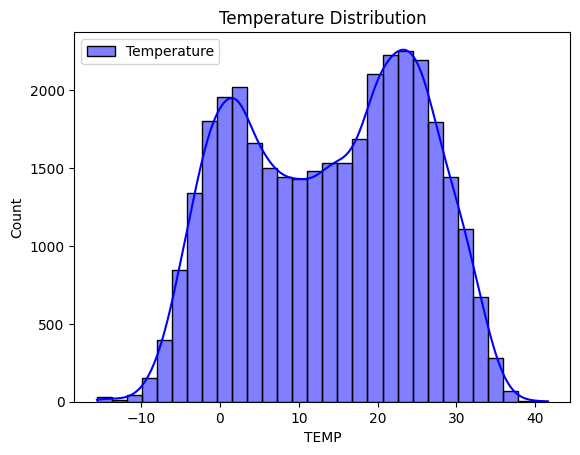

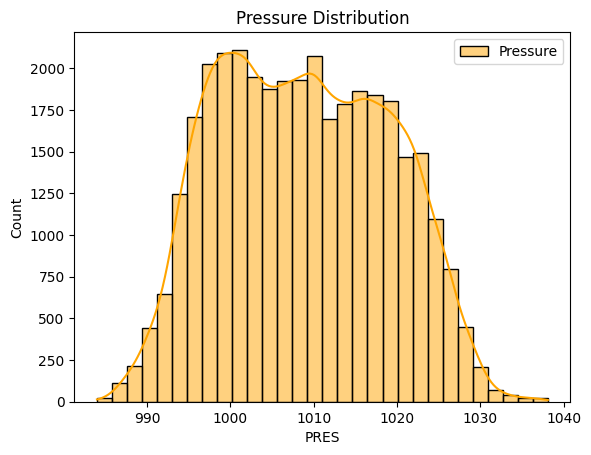

In [ ]:
# pasitikrinam ar nera keistu duomenu
sns.histplot(data_cleaned['TEMP'], kde=True, bins=30, color='blue', label='Temperature')
plt.title('Temperature Distribution')
plt.legend()
plt.show()

sns.histplot(data_cleaned['PRES'], kde=True, bins=30, color='orange', label='Pressure')
plt.title('Pressure Distribution')
plt.legend()
plt.show()

In [ ]:
# jei noriu surasti netinkama reiksme (tarkim temperatura = 1000) ir norim ja pasalinti, bet dbr neveikia ta dropna, pasiaiskinti kaip istrinti tas eilutes
data_cleaned[data_cleaned['TEMP'] > 40].dropna()

TEMP   PRES
10909  40.9  989.1
10910  41.6  988.7
10911  40.2  989.0

In [ ]:
# isifiltruojam temperatura iki 40
data_cleaned = data_cleaned[data_cleaned['TEMP'] < 40]

In [ ]:
# pasitikrinam ar yra virs 40
data_cleaned[data_cleaned['TEMP'] > 40]

Empty DataFrame
Columns: [TEMP, PRES]
Index: []

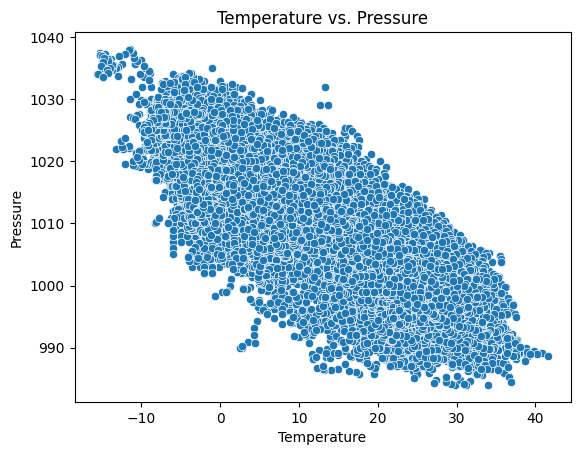

In [ ]:
# data = data_cleaned rasom 
sns.scatterplot(x='TEMP', y='PRES', data=data_cleaned)
plt.title('Temperature vs. Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [10]:
# Calculating correlation
correlation = data_cleaned['TEMP'].corr(data_cleaned['PRES'])
print(f"Correlation between TEMP and PRES: {correlation}")

Correlation between TEMP and PRES: -0.8324238231430502


In [ ]:
# # Excluding 'station' and 'wd' columns
# data_filtered = data.drop(['station', 'wd'], axis=1)

# print(data_filtered.head())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN  WSPM  
0  1021.1 -18.6   0.0   4.4  
1  1021.5 -19.0   0.0   4.0  
2  1021.5 -19.8   0.0   4.6  
3  1022.7 -21.2   0.0   2.8  
4  1023.0 -21.4   0.0   3.6  


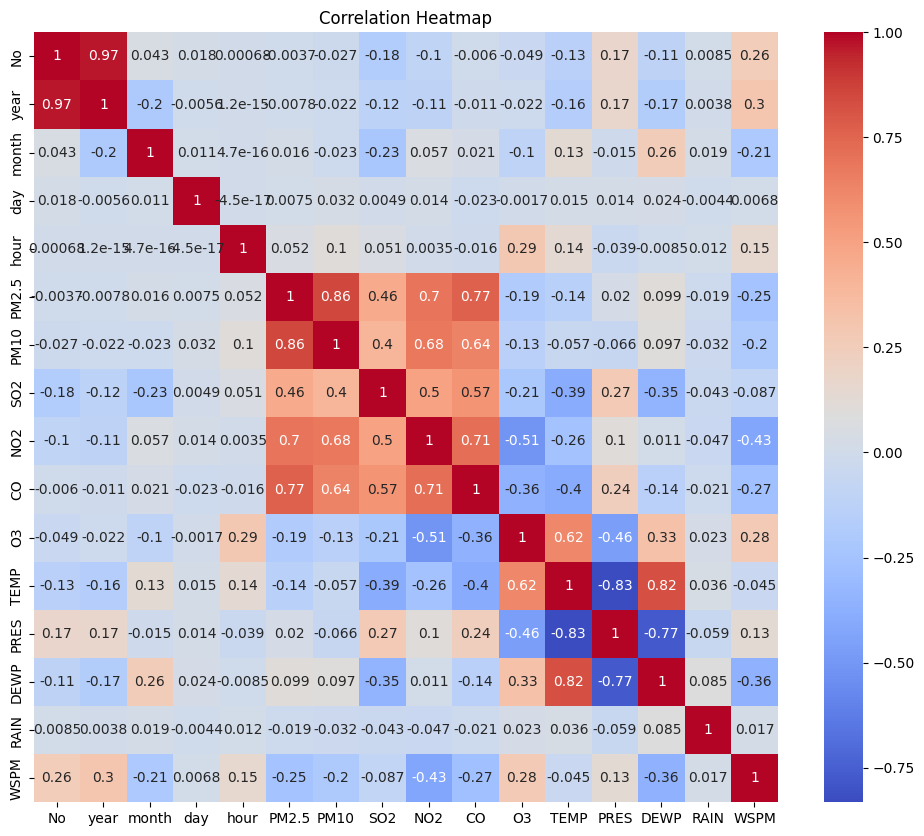

In [12]:
# Correlation matrix
corr_matrix = data_filtered.corr()

# Creating heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

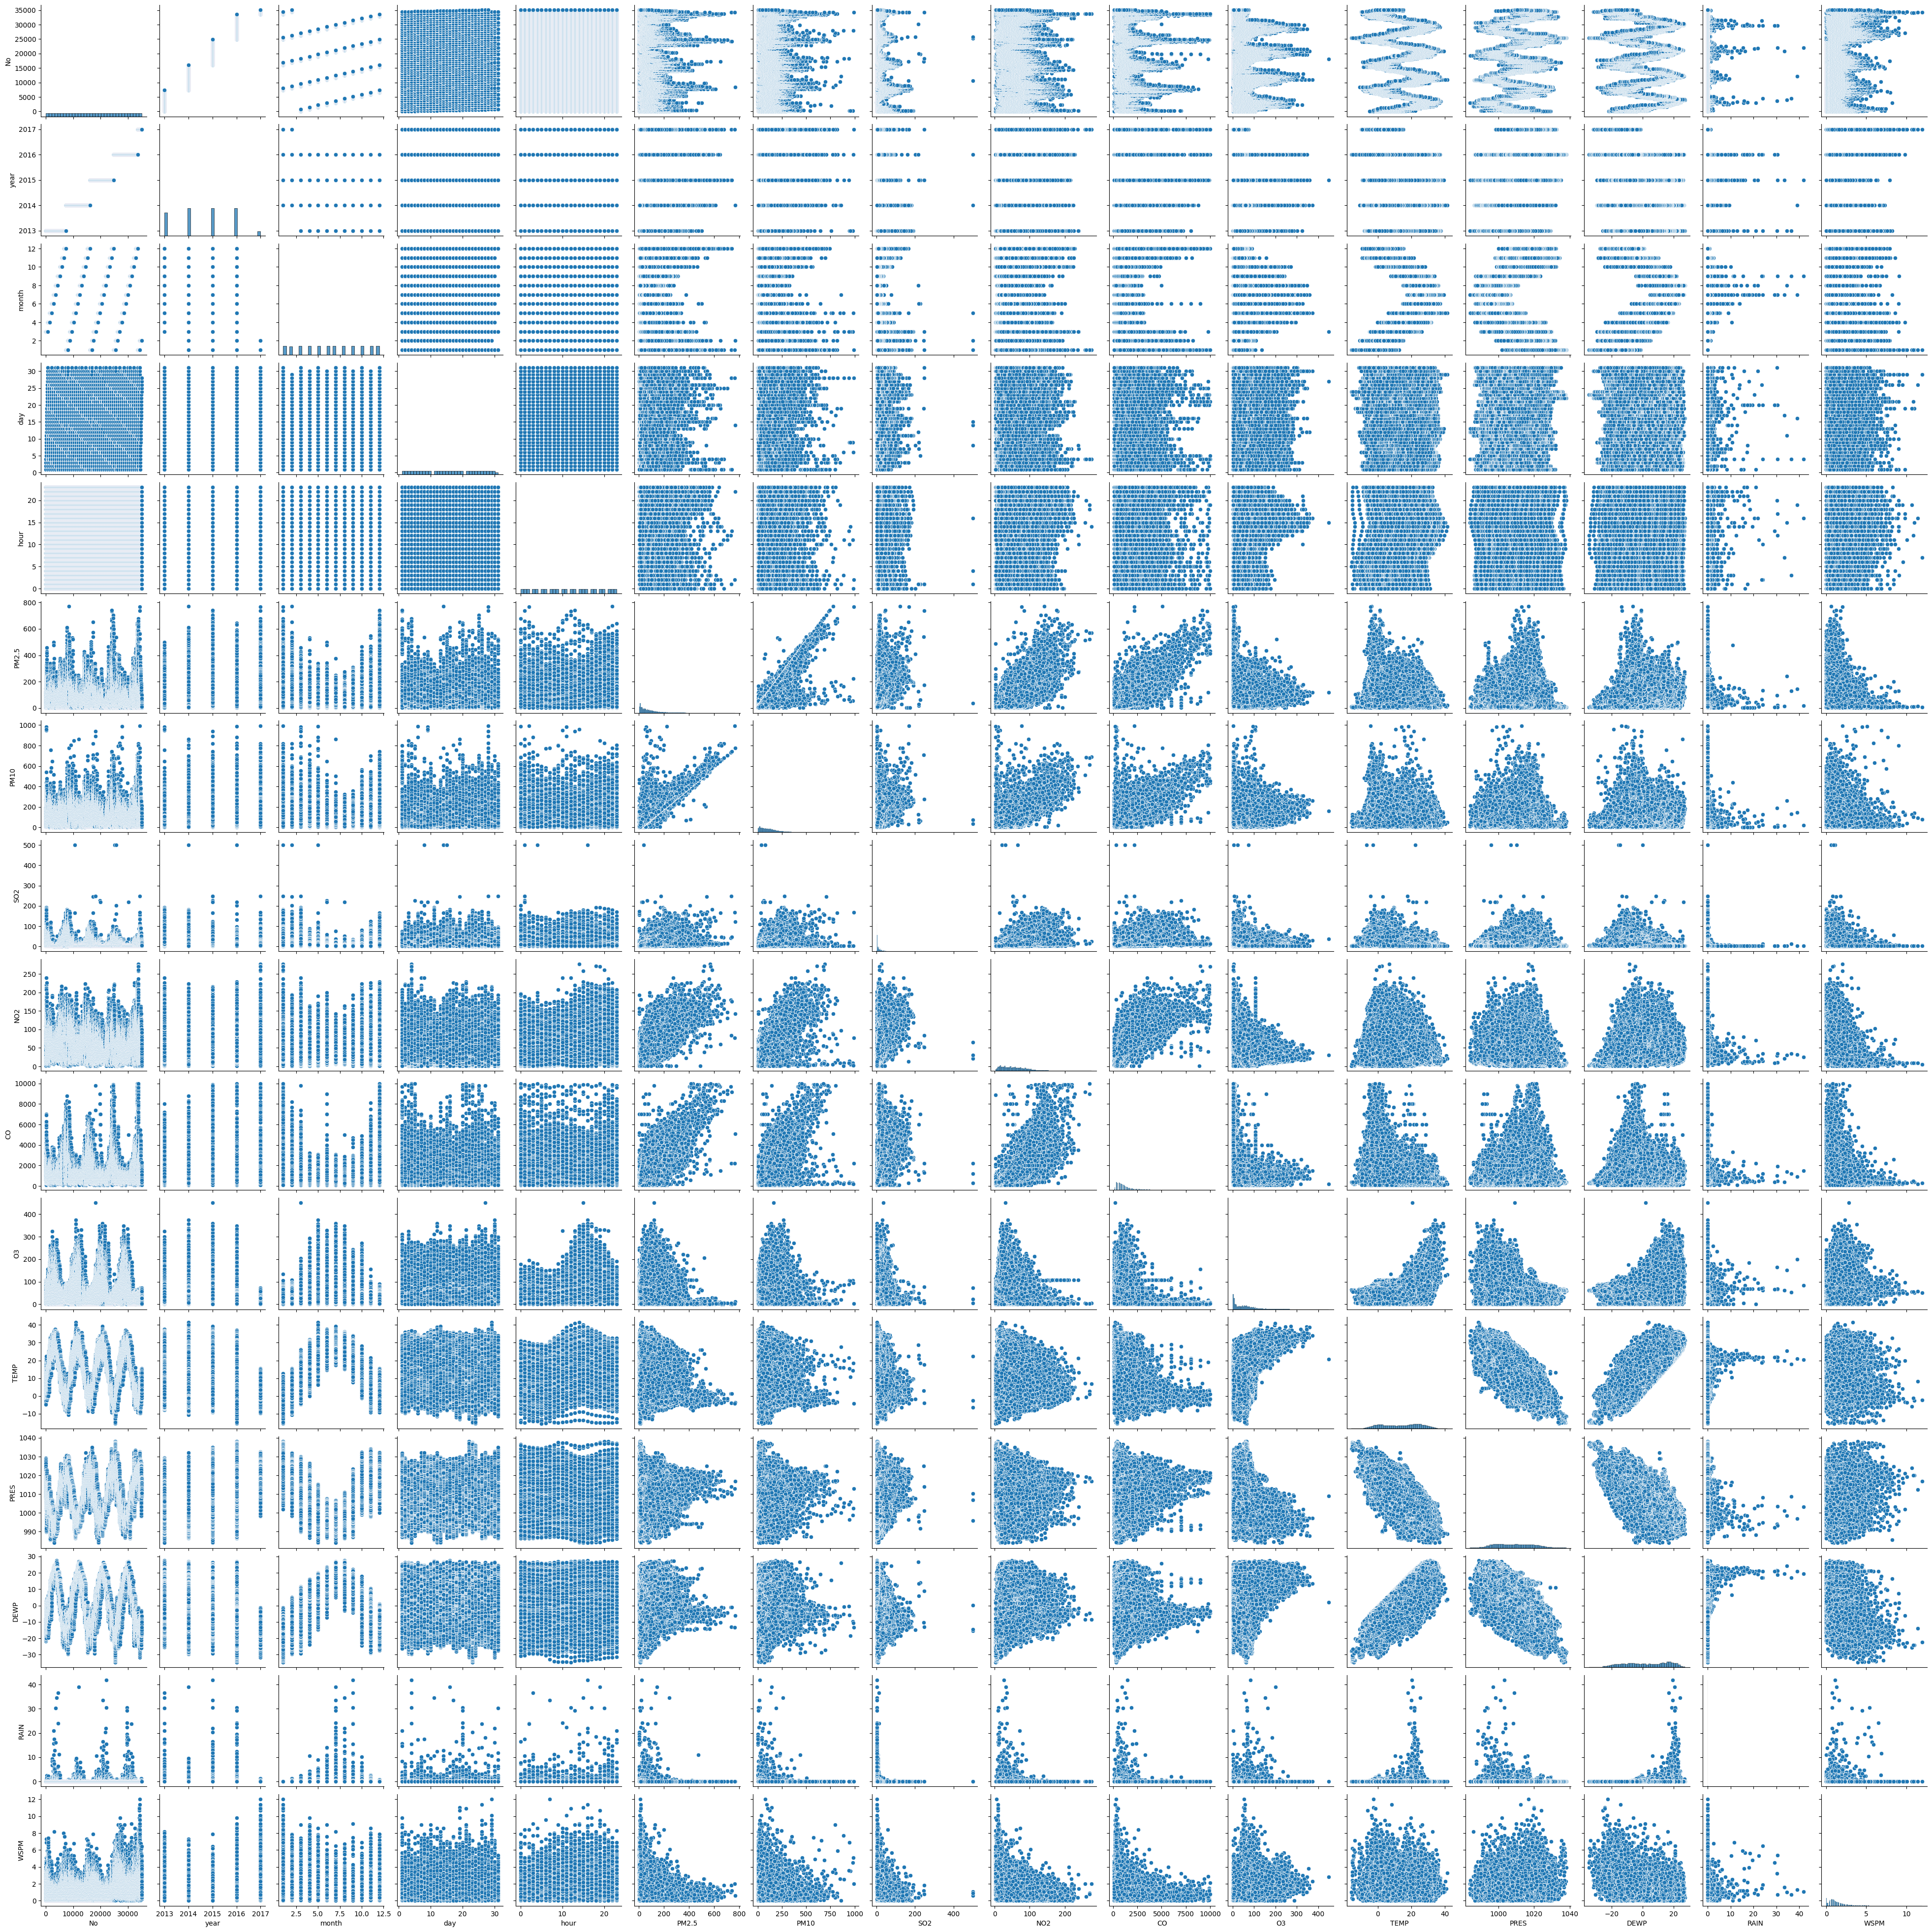

In [13]:
sns.pairplot(data_filtered)

In [14]:
# Linear Regression Model
X = data_cleaned[['TEMP']]
y = data_cleaned['PRES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions isirasom testini x kuris suprognozuoja mums Y (ta lygia tiese brezia)
y_pred = model.predict(X_test)

In [38]:
import numpy as np

In [ ]:
# r2 yra tas 70% virs nuokrypio, o tie error nuokrypiai nuo vidurkio (skirtumai tarp tieses ir tu melsvu taskiuku)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 5.551949448167691
R-squared: 0.701727789163551
Mean Absolute Error: 4.418798444728859


About 70.2% of the variance in pressure can be explained by temperature alone. This suggests a strong linear relationship.
Mean Squared Error (MSE): 30.82, which reflects the average squared difference between actual and predicted pressure values.


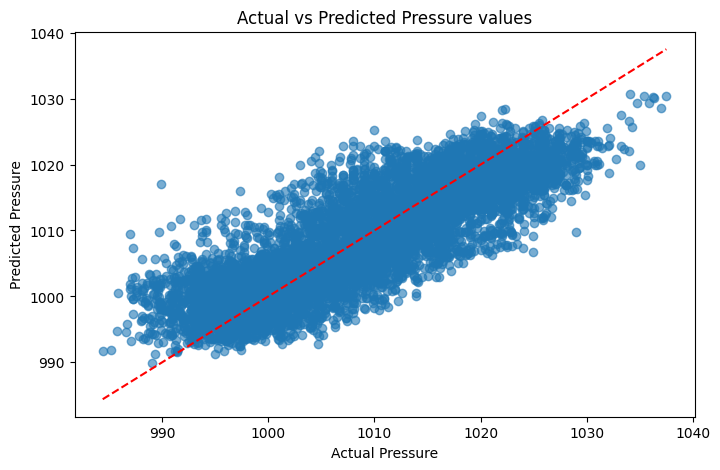

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.title('Actual vs Predicted Pressure values')
plt.xlabel('Actual Pressure')
plt.ylabel('Predicted Pressure')
plt.show()

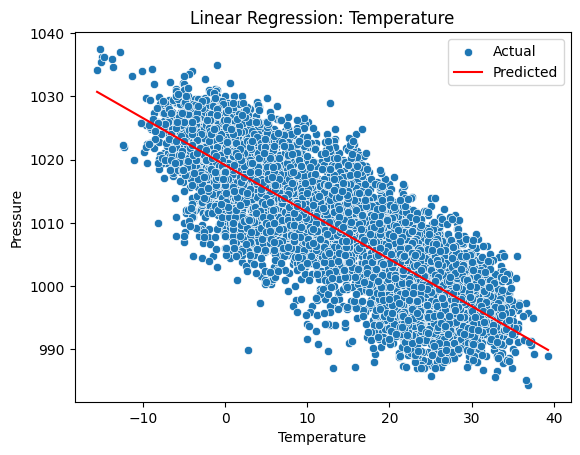

In [ ]:
# Plotting Regression Line
sns.scatterplot(x=X_test['TEMP'], y=y_test, label='Actual')
sns.lineplot(x=X_test['TEMP'], y=y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Temperature')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.show()

In [ ]:
# For every 1°C increase in temperature, the pressure decreases by ~0.74 hPa, assuming a linear relationship.
# {Pressure} = beta_0 + beta_1 X  {Temperature}
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-0.74287049]


SUMMARY:

For every 1°C increase in temperature, the atmospheric pressure decreases by approximately 0.74 hPa, assuming the relationship between the variables is linear.